# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

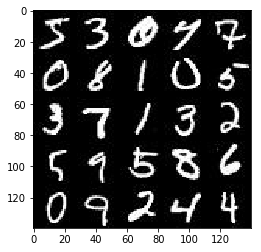

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

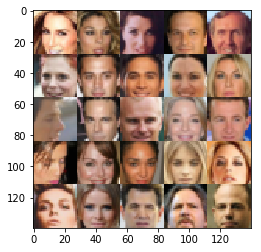

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0


C:\Users\toxia\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [99]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name = "real_input")
    z_input = tf.placeholder(tf.float32, (None, z_dim), name = "z_input")
    learning_rate = tf.placeholder(tf.float32, name = "learning_rate")
    return real_input, z_input, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "C:\\Users\\toxia\\AppData\\Local\\Continuum\\Anaconda3\\lib\\runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "C:\\Users\\toxia\\AppData\\Local\\Continuum\\Anaconda3\\lib\\runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "C:\\Users\\toxia\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "C:\\Users\\toxia\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\traitlets\\config\\application.py", line 658, in launch_instance\n    app.start()', 'File "C:\\Users\\toxia\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\ipykernel\\kernelapp.py", line

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [100]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse = reuse):
        x1 = tf.layers.conv2d(images, 64, kernel_size = 5, strides = 2, padding = 'same')
        bn1 = tf.layers.batch_normalization(x1, training = True)
        relu1 = tf.maximum(0.2 * bn1, bn1)
        
        x2 = tf.layers.conv2d(relu1, 128, kernel_size = 5, strides = 2, padding = 'same')
        bn2 = tf.layers.batch_normalization(x2, training = True)
        relu2 = tf.maximum(0.2 * bn2, bn2)
        
        x3 = tf.layers.conv2d(relu2, 256, kernel_size = 5, strides = 1, padding = 'same')
        bn3 = tf.layers.batch_normalization(x3, training = True)
        relu3 = tf.maximum(0.2 * bn3, bn3)
        
        x4 = tf.layers.conv2d(relu3, 512, kernel_size = 5, strides = 1, padding = 'same')
        bn4 = tf.layers.batch_normalization(x4, training = True)
        relu4 = tf.maximum(0.2 * bn4, bn4)
             
        flat = tf.reshape(relu4, (-1, 7 * 7 * 512))
        
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [101]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse = (not is_train)):
     
        x1 = tf.layers.dense(z, 7 * 7 * 512)
        
        
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        bn1 = tf.layers.batch_normalization(x1, training = is_train)
        relu1 = tf.maximum(0.2 * bn1, bn1)

        x2 = tf.layers.conv2d_transpose(relu1, 256, kernel_size = 5, strides = 2, padding = 'same')
        bn2 = tf.layers.batch_normalization(x2, training = is_train)
        relu2 = tf.maximum(0.2 * bn2, bn2)
        
        x3 = tf.layers.conv2d_transpose(relu2, 128, kernel_size = 5, strides = 2, padding = 'same')
        bn3 = tf.layers.batch_normalization(x3, training = is_train)
        relu3 = tf.maximum(0.2 * bn3, bn3)
        
        x4 = tf.layers.conv2d_transpose(relu3, 64, kernel_size = 5, strides = 1, padding = 'same')
        bn4 = tf.layers.batch_normalization(x4, training = is_train)
        relu4 = tf.maximum(0.2 * bn4, bn4)
       
        logits = tf.layers.conv2d_transpose(relu4, out_channel_dim, kernel_size = 5, strides = 1, padding = 'same')
        
        out = tf.tanh(logits)
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [102]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_out = generator(input_z, out_channel_dim)
    d_out_real, d_logits_real = discriminator(input_real)
    d_out_fake, d_logits_fake = discriminator(g_out, reuse = True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_real, labels = tf.ones_like(d_logits_real) * 0.95))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_fake, labels = tf.zeros_like(d_logits_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_fake, labels = tf.ones_like(d_logits_fake) * 0.95))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [103]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    
    d_train_op = tf.train.AdamOptimizer(learning_rate).minimize(d_loss, var_list = d_vars)
    g_train_op = tf.train.AdamOptimizer(learning_rate).minimize(g_loss, var_list = g_vars)
    
    return d_train_op, g_train_op


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [104]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [114]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    
    image_channels = 3
    if data_image_mode == 'L':
        image_channels = 1
        
    real_input, z_input, learning_rate_ph = model_inputs(data_shape[1], data_shape[2], image_channels, z_dim)
    d_loss, g_loss = model_loss(real_input, z_input, image_channels)
    d_train_op, g_train_op = model_opt(d_loss, g_loss, learning_rate_ph, beta1)    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            counter = 0
            for batch_images in get_batches(batch_size):
                counter = counter + 1
                rescaled_images = batch_images * 2
                
                batch_z = np.random.uniform(-1, 1, size = (batch_size, z_dim))
                
                
                
                _ = sess.run(d_train_op, feed_dict = {real_input: rescaled_images, z_input: batch_z, learning_rate_ph: learning_rate})
                _ = sess.run(g_train_op, feed_dict = {real_input: rescaled_images, z_input: batch_z, learning_rate_ph: learning_rate})
                
                if(counter % 10 == 9):
                    train_loss_d = sess.run(d_loss, feed_dict = {real_input: rescaled_images, z_input: batch_z, learning_rate_ph: learning_rate})
                    train_loss_g = sess.run(g_loss, feed_dict = {real_input: rescaled_images, z_input: batch_z, learning_rate_ph: learning_rate})
                    print("Epoch {}/{}".format(epoch_i + 1, epoch_count), "Batch {}...".format(counter + 1), "Generator loss {}...".format(train_loss_d), "Discriminator loss {}...".format(train_loss_g))
                
                if(counter % 50 == 49):
                    print("Epoch {}/{}...".format(epoch_i + 1, epoch_count), "Batch {}".format(counter + 1))
                    show_generator_output(sess, 50, z_input, image_channels, data_image_mode)
                
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2 Batch 10... Generator loss 1.1601481437683105... Discriminator loss 11.049781799316406...
Epoch 1/2 Batch 20... Generator loss 1.2842611074447632... Discriminator loss 2.505568027496338...
Epoch 1/2 Batch 30... Generator loss 1.3146982192993164... Discriminator loss 1.9830821752548218...
Epoch 1/2 Batch 40... Generator loss 0.7298136353492737... Discriminator loss 3.014065980911255...
Epoch 1/2 Batch 50... Generator loss 0.4227561950683594... Discriminator loss 6.168460845947266...
Epoch 1/2... Batch 50


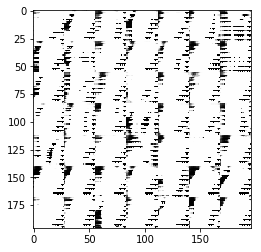

Epoch 1/2 Batch 60... Generator loss 0.40910911560058594... Discriminator loss 3.1729605197906494...
Epoch 1/2 Batch 70... Generator loss 0.33696505427360535... Discriminator loss 8.944672584533691...
Epoch 1/2 Batch 80... Generator loss 0.27981120347976685... Discriminator loss 4.041788101196289...
Epoch 1/2 Batch 90... Generator loss 0.3050324618816376... Discriminator loss 3.6521449089050293...
Epoch 1/2 Batch 100... Generator loss 0.3268996477127075... Discriminator loss 3.1032345294952393...
Epoch 1/2... Batch 100


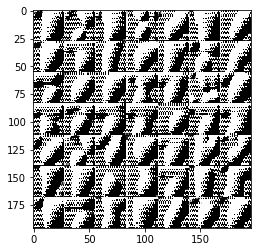

Epoch 1/2 Batch 110... Generator loss 0.452152281999588... Discriminator loss 3.1932766437530518...
Epoch 1/2 Batch 120... Generator loss 0.32138192653656006... Discriminator loss 5.771137237548828...
Epoch 1/2 Batch 130... Generator loss 0.394794762134552... Discriminator loss 3.8320984840393066...
Epoch 1/2 Batch 140... Generator loss 0.2816416919231415... Discriminator loss 7.382996559143066...
Epoch 1/2 Batch 150... Generator loss 0.3463890254497528... Discriminator loss 4.868871212005615...
Epoch 1/2... Batch 150


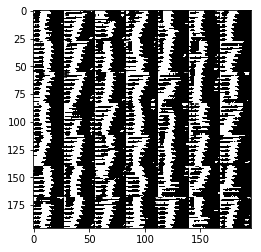

Epoch 1/2 Batch 160... Generator loss 0.4643332064151764... Discriminator loss 3.96250057220459...
Epoch 1/2 Batch 170... Generator loss 0.6022586822509766... Discriminator loss 4.083258152008057...
Epoch 1/2 Batch 180... Generator loss 0.4063873291015625... Discriminator loss 10.258861541748047...
Epoch 1/2 Batch 190... Generator loss 0.38989609479904175... Discriminator loss 3.011834144592285...
Epoch 1/2 Batch 200... Generator loss 0.9078919291496277... Discriminator loss 1.527587652206421...
Epoch 1/2... Batch 200


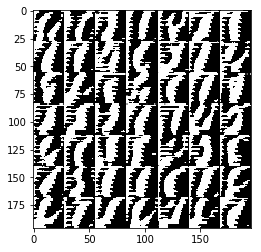

Epoch 1/2 Batch 210... Generator loss 1.4271211624145508... Discriminator loss 6.265048980712891...
Epoch 1/2 Batch 220... Generator loss 0.42581015825271606... Discriminator loss 9.072075843811035...
Epoch 1/2 Batch 230... Generator loss 1.1619149446487427... Discriminator loss 1.6521148681640625...
Epoch 1/2 Batch 240... Generator loss 2.511812210083008... Discriminator loss 3.0059046745300293...
Epoch 1/2 Batch 250... Generator loss 0.8754265904426575... Discriminator loss 4.857428550720215...
Epoch 1/2... Batch 250


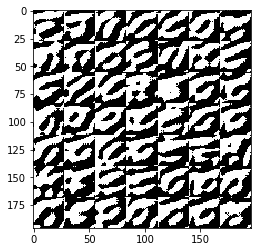

Epoch 1/2 Batch 260... Generator loss 0.796296238899231... Discriminator loss 3.3702783584594727...
Epoch 1/2 Batch 270... Generator loss 0.388823926448822... Discriminator loss 6.642228126525879...
Epoch 1/2 Batch 280... Generator loss 0.8193694353103638... Discriminator loss 11.498035430908203...
Epoch 1/2 Batch 290... Generator loss 0.5142763257026672... Discriminator loss 4.4219584465026855...
Epoch 1/2 Batch 300... Generator loss 0.9862362146377563... Discriminator loss 6.187376022338867...
Epoch 1/2... Batch 300


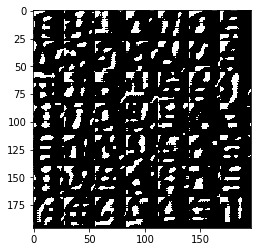

Epoch 1/2 Batch 310... Generator loss 0.40126293897628784... Discriminator loss 6.102478981018066...
Epoch 1/2 Batch 320... Generator loss 0.3580823540687561... Discriminator loss 3.975778102874756...
Epoch 1/2 Batch 330... Generator loss 0.3148289918899536... Discriminator loss 5.646249771118164...
Epoch 1/2 Batch 340... Generator loss 0.6918799877166748... Discriminator loss 1.9400297403335571...
Epoch 1/2 Batch 350... Generator loss 0.6615791320800781... Discriminator loss 3.1766068935394287...
Epoch 1/2... Batch 350


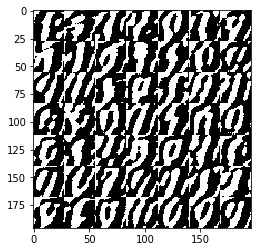

Epoch 1/2 Batch 360... Generator loss 0.3561074435710907... Discriminator loss 6.789916038513184...
Epoch 1/2 Batch 370... Generator loss 1.2943446636199951... Discriminator loss 8.51295280456543...
Epoch 1/2 Batch 380... Generator loss 0.6534143090248108... Discriminator loss 5.692700386047363...
Epoch 1/2 Batch 390... Generator loss 0.5740195512771606... Discriminator loss 3.803445816040039...
Epoch 1/2 Batch 400... Generator loss 0.5119967460632324... Discriminator loss 5.740689277648926...
Epoch 1/2... Batch 400


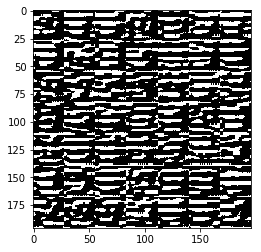

Epoch 1/2 Batch 410... Generator loss 0.37570035457611084... Discriminator loss 11.981285095214844...
Epoch 1/2 Batch 420... Generator loss 0.3013741374015808... Discriminator loss 6.986671447753906...
Epoch 1/2 Batch 430... Generator loss 0.5877151489257812... Discriminator loss 2.4341835975646973...
Epoch 1/2 Batch 440... Generator loss 0.3898330330848694... Discriminator loss 7.586589336395264...
Epoch 1/2 Batch 450... Generator loss 2.7150635719299316... Discriminator loss 6.783359050750732...
Epoch 1/2... Batch 450


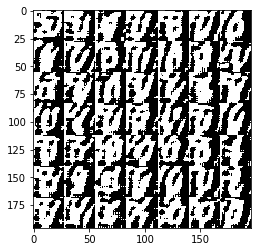

Epoch 1/2 Batch 460... Generator loss 1.0168728828430176... Discriminator loss 10.918749809265137...
Epoch 2/2 Batch 10... Generator loss 0.6793375015258789... Discriminator loss 7.025149345397949...
Epoch 2/2 Batch 20... Generator loss 0.7835691571235657... Discriminator loss 7.39577054977417...
Epoch 2/2 Batch 30... Generator loss 0.3636036217212677... Discriminator loss 7.199713706970215...
Epoch 2/2 Batch 40... Generator loss 0.604799211025238... Discriminator loss 6.55919075012207...
Epoch 2/2 Batch 50... Generator loss 0.7805365920066833... Discriminator loss 12.63713550567627...
Epoch 2/2... Batch 50


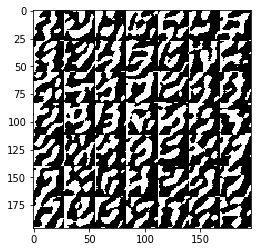

Epoch 2/2 Batch 60... Generator loss 0.7880162000656128... Discriminator loss 4.3185505867004395...
Epoch 2/2 Batch 70... Generator loss 0.3865862786769867... Discriminator loss 8.263421058654785...
Epoch 2/2 Batch 80... Generator loss 0.6392613053321838... Discriminator loss 2.447965145111084...
Epoch 2/2 Batch 90... Generator loss 0.5879725217819214... Discriminator loss 5.476620674133301...
Epoch 2/2 Batch 100... Generator loss 0.8040933609008789... Discriminator loss 5.675527095794678...
Epoch 2/2... Batch 100


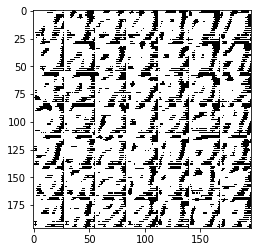

Epoch 2/2 Batch 110... Generator loss 0.570539116859436... Discriminator loss 2.4425711631774902...
Epoch 2/2 Batch 120... Generator loss 0.3532731533050537... Discriminator loss 20.50528335571289...
Epoch 2/2 Batch 130... Generator loss 0.5335657596588135... Discriminator loss 6.366567134857178...
Epoch 2/2 Batch 140... Generator loss 0.408853143453598... Discriminator loss 7.955594062805176...
Epoch 2/2 Batch 150... Generator loss 1.2888238430023193... Discriminator loss 8.79269027709961...
Epoch 2/2... Batch 150


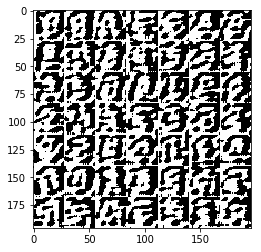

Epoch 2/2 Batch 160... Generator loss 0.3202592730522156... Discriminator loss 6.8032941818237305...
Epoch 2/2 Batch 170... Generator loss 0.3293870985507965... Discriminator loss 7.651992321014404...
Epoch 2/2 Batch 180... Generator loss 1.6696139574050903... Discriminator loss 0.8738558888435364...
Epoch 2/2 Batch 190... Generator loss 0.35777774453163147... Discriminator loss 4.171228408813477...
Epoch 2/2 Batch 200... Generator loss 0.5404049158096313... Discriminator loss 3.1696057319641113...
Epoch 2/2... Batch 200


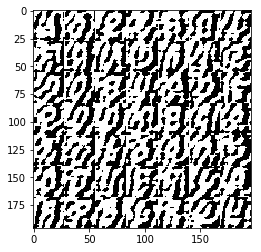

Epoch 2/2 Batch 210... Generator loss 0.7364655137062073... Discriminator loss 4.653323173522949...
Epoch 2/2 Batch 220... Generator loss 0.3804691433906555... Discriminator loss 5.864936828613281...
Epoch 2/2 Batch 230... Generator loss 0.43155404925346375... Discriminator loss 3.6328771114349365...
Epoch 2/2 Batch 240... Generator loss 0.3950985372066498... Discriminator loss 4.861204624176025...
Epoch 2/2 Batch 250... Generator loss 0.49250856041908264... Discriminator loss 8.128477096557617...
Epoch 2/2... Batch 250


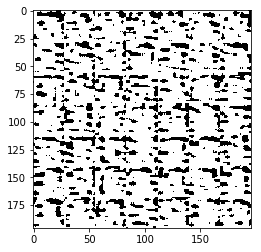

Epoch 2/2 Batch 260... Generator loss 0.3837284445762634... Discriminator loss 7.238525390625...
Epoch 2/2 Batch 270... Generator loss 0.28002455830574036... Discriminator loss 9.55733585357666...
Epoch 2/2 Batch 280... Generator loss 1.609284520149231... Discriminator loss 2.3846793174743652...
Epoch 2/2 Batch 290... Generator loss 0.6288420557975769... Discriminator loss 6.212904930114746...
Epoch 2/2 Batch 300... Generator loss 0.6808579564094543... Discriminator loss 5.072763442993164...
Epoch 2/2... Batch 300


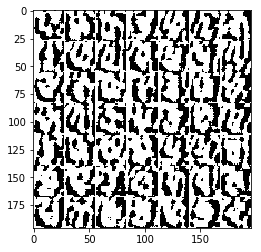

Epoch 2/2 Batch 310... Generator loss 0.2700827121734619... Discriminator loss 7.347263813018799...
Epoch 2/2 Batch 320... Generator loss 0.48575443029403687... Discriminator loss 4.317343235015869...
Epoch 2/2 Batch 330... Generator loss 0.6213995218276978... Discriminator loss 5.345578670501709...
Epoch 2/2 Batch 340... Generator loss 0.26346632838249207... Discriminator loss 5.717638969421387...
Epoch 2/2 Batch 350... Generator loss 0.2925932705402374... Discriminator loss 4.349826335906982...
Epoch 2/2... Batch 350


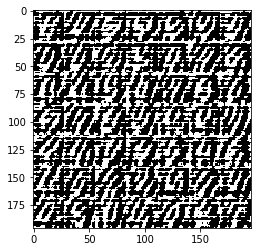

Epoch 2/2 Batch 360... Generator loss 0.27106404304504395... Discriminator loss 6.072943687438965...
Epoch 2/2 Batch 370... Generator loss 0.5145092010498047... Discriminator loss 11.686413764953613...
Epoch 2/2 Batch 380... Generator loss 0.42722606658935547... Discriminator loss 5.028192520141602...
Epoch 2/2 Batch 390... Generator loss 0.820939302444458... Discriminator loss 1.7140798568725586...
Epoch 2/2 Batch 400... Generator loss 0.30513864755630493... Discriminator loss 8.156675338745117...
Epoch 2/2... Batch 400


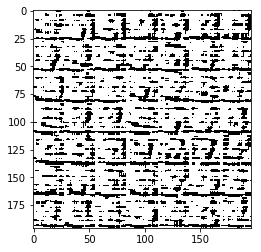

Epoch 2/2 Batch 410... Generator loss 0.34111279249191284... Discriminator loss 4.829742908477783...
Epoch 2/2 Batch 420... Generator loss 0.5820651054382324... Discriminator loss 2.607494354248047...
Epoch 2/2 Batch 430... Generator loss 0.6939135789871216... Discriminator loss 18.73910140991211...
Epoch 2/2 Batch 440... Generator loss 0.5016691088676453... Discriminator loss 9.133904457092285...
Epoch 2/2 Batch 450... Generator loss 0.6359078884124756... Discriminator loss 7.247037887573242...
Epoch 2/2... Batch 450


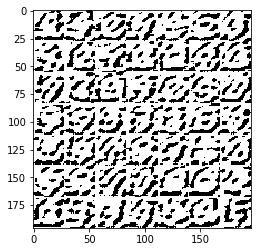

Epoch 2/2 Batch 460... Generator loss 0.637546181678772... Discriminator loss 7.908395767211914...


In [119]:
batch_size = 128
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1 Batch 10... Generator loss 1.3223165273666382... Discriminator loss 17.05868148803711...
Epoch 1/1 Batch 20... Generator loss 1.1132773160934448... Discriminator loss 7.315752983093262...
Epoch 1/1 Batch 30... Generator loss 0.744907796382904... Discriminator loss 4.227800369262695...
Epoch 1/1 Batch 40... Generator loss 0.37710994482040405... Discriminator loss 7.000509262084961...
Epoch 1/1 Batch 50... Generator loss 0.318664014339447... Discriminator loss 4.278815269470215...
Epoch 1/1... Batch 50


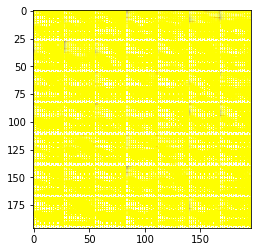

Epoch 1/1 Batch 60... Generator loss 0.3692193925380707... Discriminator loss 5.259469032287598...
Epoch 1/1 Batch 70... Generator loss 0.30670100450515747... Discriminator loss 6.158761978149414...
Epoch 1/1 Batch 80... Generator loss 0.30171331763267517... Discriminator loss 4.614103317260742...
Epoch 1/1 Batch 90... Generator loss 0.3038631081581116... Discriminator loss 7.41121768951416...
Epoch 1/1 Batch 100... Generator loss 0.31387820839881897... Discriminator loss 3.8508658409118652...
Epoch 1/1... Batch 100


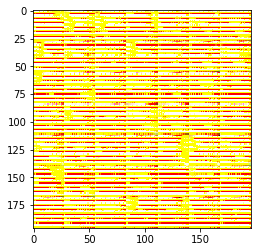

Epoch 1/1 Batch 110... Generator loss 0.25889745354652405... Discriminator loss 5.646482467651367...
Epoch 1/1 Batch 120... Generator loss 0.2575088441371918... Discriminator loss 5.507396221160889...
Epoch 1/1 Batch 130... Generator loss 0.2789413034915924... Discriminator loss 4.1745829582214355...
Epoch 1/1 Batch 140... Generator loss 0.24684110283851624... Discriminator loss 5.543676853179932...
Epoch 1/1 Batch 150... Generator loss 0.3141280710697174... Discriminator loss 3.458833694458008...
Epoch 1/1... Batch 150


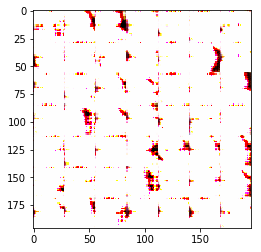

Epoch 1/1 Batch 160... Generator loss 0.27277636528015137... Discriminator loss 4.452564239501953...
Epoch 1/1 Batch 170... Generator loss 0.27609774470329285... Discriminator loss 4.784122467041016...
Epoch 1/1 Batch 180... Generator loss 0.2699611485004425... Discriminator loss 7.8099822998046875...
Epoch 1/1 Batch 190... Generator loss 0.3306030333042145... Discriminator loss 8.794024467468262...
Epoch 1/1 Batch 200... Generator loss 0.24460430443286896... Discriminator loss 7.335000991821289...
Epoch 1/1... Batch 200


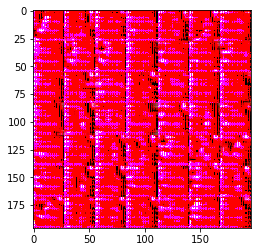

Epoch 1/1 Batch 210... Generator loss 0.23995038866996765... Discriminator loss 4.835697174072266...
Epoch 1/1 Batch 220... Generator loss 0.2418195605278015... Discriminator loss 4.67732048034668...
Epoch 1/1 Batch 230... Generator loss 0.22755475342273712... Discriminator loss 5.801479816436768...
Epoch 1/1 Batch 240... Generator loss 0.23002730309963226... Discriminator loss 5.5633392333984375...
Epoch 1/1 Batch 250... Generator loss 0.23089155554771423... Discriminator loss 6.274209022521973...
Epoch 1/1... Batch 250


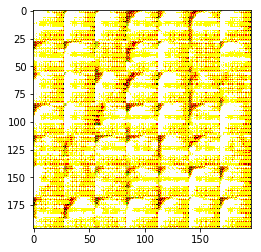

Epoch 1/1 Batch 260... Generator loss 0.22439414262771606... Discriminator loss 5.829938888549805...
Epoch 1/1 Batch 270... Generator loss 0.2202499955892563... Discriminator loss 8.030340194702148...
Epoch 1/1 Batch 280... Generator loss 0.21241652965545654... Discriminator loss 6.780520915985107...
Epoch 1/1 Batch 290... Generator loss 0.22048458456993103... Discriminator loss 7.335363864898682...
Epoch 1/1 Batch 300... Generator loss 0.21943120658397675... Discriminator loss 7.173639297485352...
Epoch 1/1... Batch 300


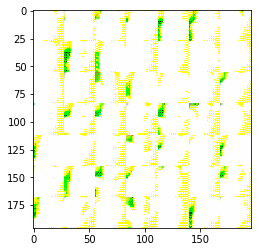

Epoch 1/1 Batch 310... Generator loss 0.2245129942893982... Discriminator loss 5.061049461364746...
Epoch 1/1 Batch 320... Generator loss 0.24762481451034546... Discriminator loss 7.508768081665039...
Epoch 1/1 Batch 330... Generator loss 0.22136598825454712... Discriminator loss 7.728824615478516...
Epoch 1/1 Batch 340... Generator loss 0.829047441482544... Discriminator loss 16.653215408325195...
Epoch 1/1 Batch 350... Generator loss 0.7341258525848389... Discriminator loss 26.378637313842773...
Epoch 1/1... Batch 350


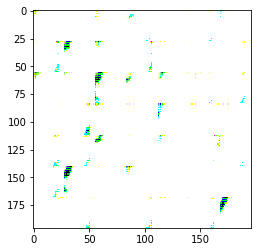

Epoch 1/1 Batch 360... Generator loss 0.4244392514228821... Discriminator loss 5.7634077072143555...
Epoch 1/1 Batch 370... Generator loss 0.2813490629196167... Discriminator loss 7.977840900421143...
Epoch 1/1 Batch 380... Generator loss 0.2374059557914734... Discriminator loss 6.616361141204834...
Epoch 1/1 Batch 390... Generator loss 0.4246390163898468... Discriminator loss 2.28912615776062...
Epoch 1/1 Batch 400... Generator loss 0.25433415174484253... Discriminator loss 6.152551174163818...
Epoch 1/1... Batch 400


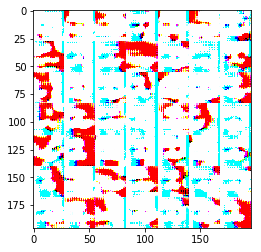

Epoch 1/1 Batch 410... Generator loss 0.26947760581970215... Discriminator loss 4.272327423095703...
Epoch 1/1 Batch 420... Generator loss 0.2939866781234741... Discriminator loss 4.519416809082031...
Epoch 1/1 Batch 430... Generator loss 0.271086186170578... Discriminator loss 13.285255432128906...
Epoch 1/1 Batch 440... Generator loss 0.300706148147583... Discriminator loss 3.5031118392944336...
Epoch 1/1 Batch 450... Generator loss 0.2689202129840851... Discriminator loss 6.343242645263672...
Epoch 1/1... Batch 450


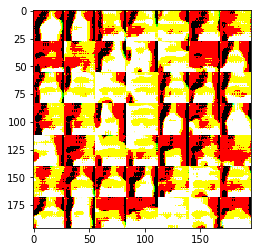

Epoch 1/1 Batch 460... Generator loss 0.25259295105934143... Discriminator loss 6.620052337646484...
Epoch 1/1 Batch 470... Generator loss 0.3408973515033722... Discriminator loss 3.578683376312256...
Epoch 1/1 Batch 480... Generator loss 0.9987088441848755... Discriminator loss 12.822189331054688...
Epoch 1/1 Batch 490... Generator loss 0.5603229999542236... Discriminator loss 5.211574554443359...
Epoch 1/1 Batch 500... Generator loss 0.4094701409339905... Discriminator loss 8.044417381286621...
Epoch 1/1... Batch 500


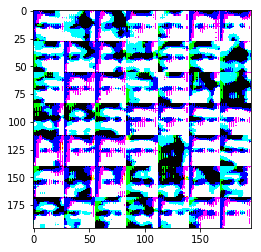

Epoch 1/1 Batch 510... Generator loss 0.28987959027290344... Discriminator loss 5.256954669952393...
Epoch 1/1 Batch 520... Generator loss 0.33025088906288147... Discriminator loss 3.763646125793457...
Epoch 1/1 Batch 530... Generator loss 0.2586434781551361... Discriminator loss 5.019872188568115...
Epoch 1/1 Batch 540... Generator loss 0.26104676723480225... Discriminator loss 4.226649761199951...
Epoch 1/1 Batch 550... Generator loss 0.24326840043067932... Discriminator loss 5.467657089233398...
Epoch 1/1... Batch 550


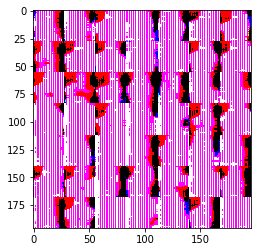

Epoch 1/1 Batch 560... Generator loss 0.2286018282175064... Discriminator loss 5.865494251251221...
Epoch 1/1 Batch 570... Generator loss 0.2388438731431961... Discriminator loss 5.167171955108643...
Epoch 1/1 Batch 580... Generator loss 0.2813015580177307... Discriminator loss 4.039397239685059...
Epoch 1/1 Batch 590... Generator loss 0.2522493898868561... Discriminator loss 7.819873809814453...
Epoch 1/1 Batch 600... Generator loss 0.2321547418832779... Discriminator loss 6.198736190795898...
Epoch 1/1... Batch 600


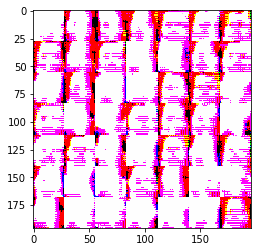

Epoch 1/1 Batch 610... Generator loss 0.2458733320236206... Discriminator loss 4.674163341522217...
Epoch 1/1 Batch 620... Generator loss 0.23047417402267456... Discriminator loss 6.84077787399292...
Epoch 1/1 Batch 630... Generator loss 0.23244570195674896... Discriminator loss 4.861006736755371...
Epoch 1/1 Batch 640... Generator loss 0.24546730518341064... Discriminator loss 7.349853038787842...
Epoch 1/1 Batch 650... Generator loss 0.2407805174589157... Discriminator loss 12.263911247253418...
Epoch 1/1... Batch 650


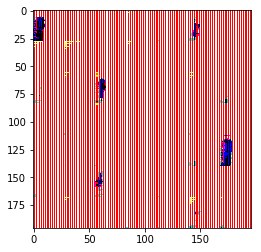

Epoch 1/1 Batch 660... Generator loss 0.21446853876113892... Discriminator loss 9.774422645568848...
Epoch 1/1 Batch 670... Generator loss 0.24019719660282135... Discriminator loss 8.405303001403809...
Epoch 1/1 Batch 680... Generator loss 0.22462864220142365... Discriminator loss 8.753053665161133...
Epoch 1/1 Batch 690... Generator loss 0.20920014381408691... Discriminator loss 8.572739601135254...
Epoch 1/1 Batch 700... Generator loss 0.2080228477716446... Discriminator loss 8.06110668182373...
Epoch 1/1... Batch 700


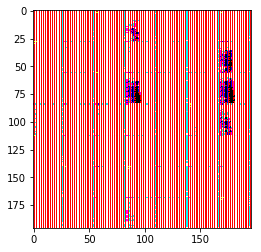

Epoch 1/1 Batch 710... Generator loss 0.2024567723274231... Discriminator loss 8.31515884399414...
Epoch 1/1 Batch 720... Generator loss 0.20530965924263... Discriminator loss 8.264734268188477...
Epoch 1/1 Batch 730... Generator loss 0.20833024382591248... Discriminator loss 8.32600212097168...
Epoch 1/1 Batch 740... Generator loss 0.20330965518951416... Discriminator loss 8.391059875488281...
Epoch 1/1 Batch 750... Generator loss 0.20346005260944366... Discriminator loss 8.206521987915039...
Epoch 1/1... Batch 750


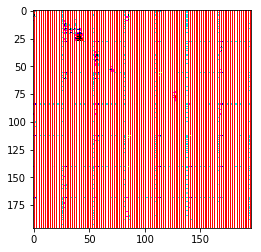

Epoch 1/1 Batch 760... Generator loss 0.20214830338954926... Discriminator loss 8.294488906860352...
Epoch 1/1 Batch 770... Generator loss 0.2011181116104126... Discriminator loss 8.194259643554688...
Epoch 1/1 Batch 780... Generator loss 0.2009723037481308... Discriminator loss 8.392548561096191...
Epoch 1/1 Batch 790... Generator loss 0.2015303075313568... Discriminator loss 7.94764518737793...


In [120]:
batch_size = 256
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.